<a href="https://colab.research.google.com/github/yanos84/Tutorials/blob/main/Lab_session_CNN_Aerial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OpenCV** is a huge open-source library for computer vision, machine learning, and image processing. OpenCV supports a wide variety of programming languages like Python, C++, Java, etc. It can process images and videos to identify objects, faces, or even the handwriting of a human. When it is integrated with various libraries, such as Numpy which is a highly optimized library for numerical operations, then the number of weapons increases in your Arsenal i.e whatever operations one can do in Numpy can be combined with OpenCV. This OpenCV tutorial will help you learn the Image-processing from Basics to Advance, like operations on Images, Videos using a huge set of Opencv-programs and projects.

To use opencv, simply import cv2 library.

In [3]:
import cv2
cv2.__version__

'4.10.0'

Following types of files are supported in OpenCV library:

*   Windows bitmaps – *.bmp, *.dib
*   JPEG files – *.jpeg, *.jpg
*   Portable Network Graphics – *.png
*   WebP – *.webp
*   Sun rasters – *.sr, *.ras
*   TIFF files – *.tiff, *.tif
*   Raster and Vector geospatial data supported by GDAL


  To use the OpenCV library in python, we need essentially Numpy and Pyplot libraries.

In [4]:
import numpy as np
from matplotlib import pyplot as plt

To read an image, we use cv2.imred(). This function uses two flags to format an image. The most used on is **IMREAD_COLOR** : If set, always convert image to the 3 channel BGR color image. We load the "eye.jpg" image in a variable called "img":

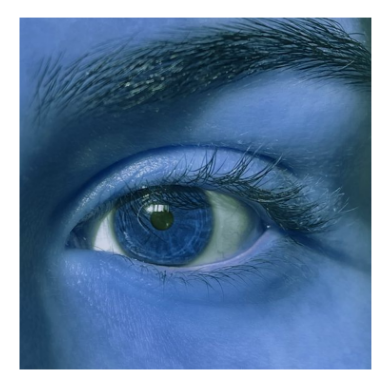

In [11]:
img = cv2.imread("eye.png", cv2.IMREAD_COLOR)
plt.imshow(img)
plt.axis('off') # Turn off axis
plt.show()

To properly display the image by pyplot, we have to order the colors to be in BGR format. An RGB image has three channels: red, green, and blue. RGB channels roughly follow the color receptors in the human eye, and are used in computer displays and image scanners.

If the RGB image is 24-bit (the industry standard as of 2005), each channel has 8 bits, for red, green, and blue—in other words, the image is composed of three images (one for each channel), where each image can store discrete pixels with conventional brightness intensities between 0 and 255. If the RGB image is 48-bit (very high color-depth), each channel has 16-bit per pixel color, that is 16-bit red, green, and blue for each per pixel.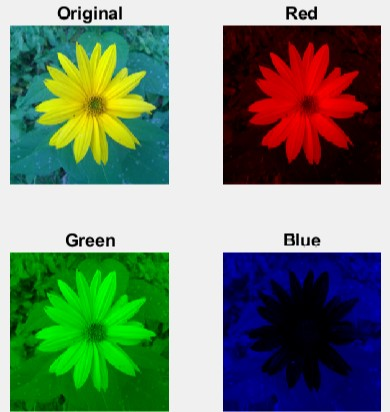

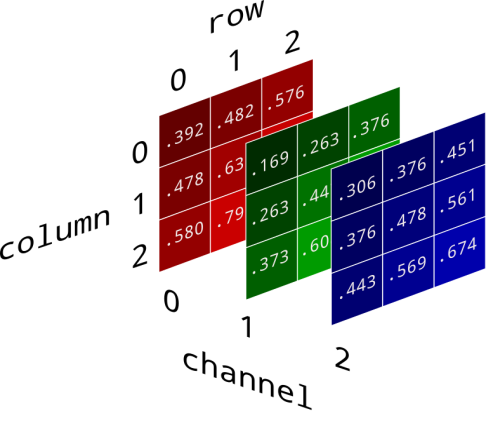

To do so we use cv2.cvtColor to convert the image into the appropriate format. The flag COLOR_BGR2RGB is the corresponding one. We can use this image (you must put it in the /content folder and rename it as in the code)

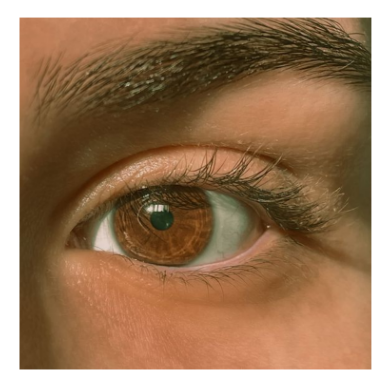

In [10]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off') # Turn off axis
plt.show()

The HoughCircles algorithm, part of the Hough Transform family, is designed to detect circular shapes in images. It identifies circles by parameterizing the equation of a circle and mapping edge points from the image space to a parameter space, where the circle's existence can be inferred through accumulation.

3


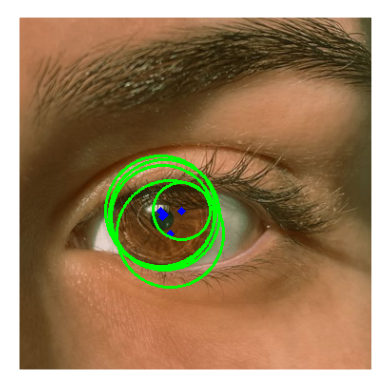

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.blur(gray, (10,10))
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, param2 = 30, minRadius = 10, maxRadius = 90)
print(cv2.HOUGH_GRADIENT)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off') # Turn off axis
plt.show()

But what if we want to detect other regular forms of an image (rectangles, triangles, ellipses..) or eveb irrugular forms!!
An algorithm for every type or
**A UNIVERSAL FORM DETECTOR**




---



Skyview is a curated dataset for aerial landscape classification featuring 15 diverse categories, each comprising 800 high-quality images at a resolution of 256x256 pixels. This dataset is a fusion of images sourced from the publicly available AID and NWPU-Resisc45 datasets. The compilation is designed to facilitate research and development in the field of computer vision, particularly in the context of aerial landscape analysis.

We can download the dataset directly from Kaggle:

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankit1743/skyview-an-aerial-landscape-dataset")

print("Path to dataset files:", path)

100%|██████████| 154M/154M [00:01<00:00, 92.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ankit1743/skyview-an-aerial-landscape-dataset/versions/1


Then we copy it from the cach to the */content* forlder:

In [2]:
!ls /root/.cache/kagglehub/datasets/ankit1743/skyview-an-aerial-landscape-dataset/versions/1
!cp -r /root/.cache/kagglehub/datasets/ankit1743/skyview-an-aerial-landscape-dataset/versions/1 /content/skyview-dataset

Aerial_Landscapes


CNN stands for Convolutional Neural Network. It is a type of deep learning algorithm that is particularly well-suited for image recognition and classification tasks. CNNs are inspired by the biological structure of the visual cortex in the brain. It contains sequential structure of layers:



*   **Convolutional layers:** These layers apply filters to the input image to extract features such as edges, corners, and textures.
*   **Pooling layers:** These layers reduce the spatial dimensions of the feature maps, which helps to reduce the computational complexity of the network and make it more robust to variations in the input image.
*   **Fully connected layers:** These layers connect all the neurons in the previous layer to all the neurons in the current layer, and are typically used for classification.

CNNs have achieved state-of-the-art results in a wide range of image recognition tasks, including object detection, image segmentation, and facial recognition. They are also being used in other areas such as natural language processing and speech recognition.

Now, we define a CNN block to use it for the model creation
see [This link](https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/)



---



Before defining the CNN, we should organize the dataset in a suitable form (trainig and testing sets).

First of all, we import the right libraries and fix some parameters:

In [24]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Define the dataset directory
dataset_dir = "/content/skyview-dataset/Aerial_Landscapes"

# Split the dataset into training and testing sets
batch_size = 32
img_height = 128  # Resize height
img_width = 128   # Resize width

Next, we create the training set using *image_dataset_from_directory* function:

In [28]:
# Training dataset
train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,  # Reserve 20% for testing
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
type(train_ds)

Found 12000 files belonging to 15 classes.
Using 9600 files for training.


tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [30]:
# Testing dataset
test_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 12000 files belonging to 15 classes.
Using 2400 files for validation.


We can test if the function captures the right class names:

In [31]:
# Check the class names
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['Agriculture', 'Airport', 'Beach', 'City', 'Desert', 'Forest', 'Grassland', 'Highway', 'Lake', 'Mountain', 'Parking', 'Port', 'Railway', 'Residential', 'River']


Now, we transform the dataset to be useble by tensorflow

In [32]:
import numpy as np

# Extract training data
x_train, y_train = zip(*[(x.numpy(), y.numpy()) for x, y in train_ds])
x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)

# Extract testing data
x_test, y_test = zip(*[(x.numpy(), y.numpy()) for x, y in test_ds])
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (9600, 128, 128, 3), y_train shape: (9600,)
x_test shape: (2400, 128, 128, 3), y_test shape: (2400,)


TypeError: '_PrefetchDataset' object is not subscriptable

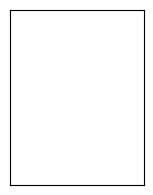

In [36]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Display the image
    plt.imshow(x_train[i])
    # Add the class label below each image
    #plt.xlabel(class_names[x_train[i][0]])
plt.show()